In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('Future_Forecasted_Sales.csv')

In [7]:
data.rename(columns={'Unnamed: 0':'Date','Forecasting':'Forecasted_sales'},inplace=True)

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data=data.sort_values(by='Date',ascending='True')

In [11]:
data.set_index('Date',inplace=True)

In [12]:
data

,Forecasted_sales
Date,
2018-03-25,2.001255e+06
2018-03-26,1.857184e+06
2018-03-27,1.956634e+06
2018-03-28,2.186617e+06
2018-03-29,2.173553e+06
...,...
2018-06-21,2.106937e+06
2018-06-22,1.902912e+06
2018-06-23,1.982405e+06


In [13]:
avocado_data=pd.read_csv('avocado.csv')

In [25]:
filt=(avocado_data['region']=='Houston') & (avocado_data['type']=='conventional')
avocado_data=avocado_data.loc[filt].drop(columns=['region','type'])

In [27]:
avocado_data=avocado_data.sort_values(by='Date',ascending='True')

In [30]:
avocado_data.iloc[-1:]['AveragePrice']

8694    0.56
Name: AveragePrice, dtype: float64

<H2> Following calculations based on https://www.r-bloggers.com/2019/11/combining-price-elasticities-and-sales-forecastings-for-sales-improvement/ </h2>

In [44]:
desc=data.describe()
desc_min=desc.loc['min','Forecasted_sales']
desc_max=desc.loc['max','Forecasted_sales']

In [53]:
import random
random_sales=[]
for i in range(data.shape[0]):
    random_sales.append(random.uniform(desc_min,desc_max))


In [55]:
data['Target_Sales']=random_sales

In [56]:
data

,Forecasted_sales,Target_Sales
Date,,
2018-03-25,2.001255e+06,2.748581e+06
2018-03-26,1.857184e+06,1.510759e+06
2018-03-27,1.956634e+06,1.578799e+06
2018-03-28,2.186617e+06,2.642664e+06
2018-03-29,2.173553e+06,1.896117e+06
...,...,...
2018-06-21,2.106937e+06,2.319297e+06
2018-06-22,1.902912e+06,2.742267e+06
2018-06-23,1.982405e+06,1.833723e+06


In [61]:
recent_price=0.56
ped=-0.60300792
data['Adjusted_Price']=np.power((data['Target_Sales']/data['Forecasted_sales']),(1/ped))


In [63]:
data['Recent_Price']=recent_price

In [64]:
data.head()

,Forecasted_sales,Target_Sales,Adjusted_Price,Recent_Price
Date,,,,
2018-03-25,2.001255e+06,2.748581e+06,0.590839,0.56
2018-03-26,1.857184e+06,1.510759e+06,1.408275,0.56
2018-03-27,1.956634e+06,1.578799e+06,1.427349,0.56
2018-03-28,2.186617e+06,2.642664e+06,0.730413,0.56
2018-03-29,2.173553e+06,1.896117e+06,1.254148,0.56


In [70]:
data.tail()

,Forecasted_sales,Target_Sales,Adjusted_Price,Recent_Price,Old_Price_Revenue,Adjusted_Price_Revenue
Date,,,,,,
2018-06-21,2.106937e+06,2.319297e+06,0.852784,0.56,1.179885e+06,1.796762e+06
2018-06-22,1.902912e+06,2.742267e+06,0.545550,0.56,1.065631e+06,1.038133e+06
2018-06-23,1.982405e+06,1.833723e+06,1.138019,0.56,1.110147e+06,2.256013e+06
2018-06-24,2.315474e+06,2.568432e+06,0.842030,0.56,1.296665e+06,1.949698e+06
2018-06-25,2.300420e+06,2.551918e+06,0.841929,0.56,1.288235e+06,1.936790e+06


In [65]:
data['Old_Price_Revenue']=data['Forecasted_sales']*data['Recent_Price']
data['Adjusted_Price_Revenue']=data['Forecasted_sales']*data['Adjusted_Price']

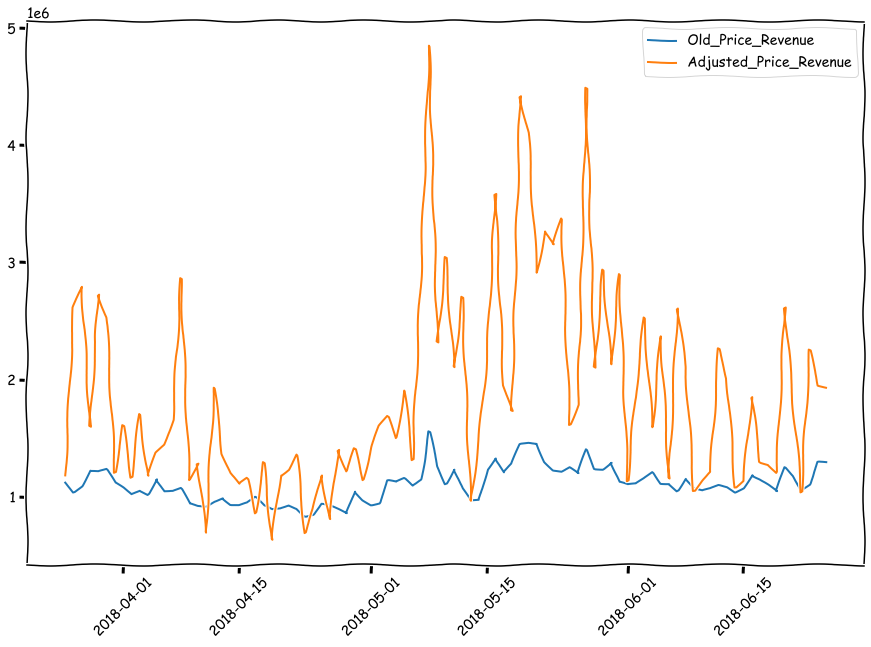

In [69]:
with plt.xkcd():
    plt.figure(figsize=(15,10))

    plt.plot(data['Old_Price_Revenue'],label='Old_Price_Revenue')
    plt.plot(data['Adjusted_Price_Revenue'],label='Adjusted_Price_Revenue')
    plt.legend()
    plt.xticks(rotation=45)
    plt.savefig('Revenue_Comparisons.png')
    plt.show()

<H2> Last data entry  : 2018-03-25, Forecasted for 3 months, Last date predicted : 2018-06-25 </h2>
<h2> Adjusted Price = (Forecasted_sales / Required Target Sales) ^ (1/ elasticity of demand) ; This formula taken from https://www.r-bloggers.com/2019/11/combining-price-elasticities-and-sales-forecastings-for-sales-improvement/ </h1>

<h2> Elasticity value taken from Linear Regression (Log log tranformation of quantity sales vs price value) </h2>